### Import 

In [1]:
import re
import math 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from pandas.api.types import CategoricalDtype

### Read datasets

In [2]:
intakes = pd.read_csv('intakes.csv', sep = ',')
outcomes = pd.read_csv('outcomes.csv', sep = ',')

### Data exploration

In [3]:
display(intakes)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
138580,A856010,Snow,04/27/2022 07:54:00 AM,April 2022,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair,White
138581,A855811,A855811,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Labrador Retriever Mix,Brown Brindle/Black
138582,A855815,A855815,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,Labrador Retriever Mix,Brown/Black
138583,A855818,*Pumbaa,04/23/2022 02:44:00 PM,April 2022,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Anatol Shepherd/German Shepherd,Brown


In [4]:
display(outcomes)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
138764,A855717,NaN,04/26/2022 05:15:00 PM,Apr 2022,01/26/2022,Adoption,NaN,Cat,Neutered Male,2 months,Maine Coon,Blue
138765,A855721,Isis,04/26/2022 06:07:00 PM,Apr 2022,01/07/2022,Adoption,NaN,Dog,Spayed Female,3 months,Catahoula,Brown Merle/White
138766,A855973,A855973,04/26/2022 06:41:00 PM,Apr 2022,04/24/2022,Transfer,Partner,Cat,Intact Female,2 days,Domestic Shorthair,Cream Tabby
138767,A547142,Foxy,04/26/2022 06:04:00 PM,Apr 2022,06/19/2006,Transfer,Partner,Dog,Spayed Female,15 years,Pomeranian,Tan


__Comments:__
* we can see that IDs have same pattern, starts with 'A' + some digits
* some animals have IDs instead of their names in both datasets
* we have duplicated elements in dataset intakes (may be in outcomes as well)
* we have NaN values in both datasets
* we have corrupted data (for example last row in column Name in outcomes dataset)

In [5]:
display(intakes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

In [6]:
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

__Comment:__
* all columns have dtype `object`

In [7]:
display(intakes.isnull().sum())

Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [8]:
display(outcomes.isnull().sum())

Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

__Comment:__
* Here we can see how much NaN values has each column 

In [9]:
intakes.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


In [10]:
outcomes.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


### Feature Engineering

#### convert into category

In [11]:
def to_cat(df):
    for i in df.columns:
        df[i] = df[i].astype('category')

In [12]:
# convert all columns dtypes into category
to_cat(intakes)
to_cat(outcomes)

PS. category dtype = less memory usage (than object dtype)

#### drop duplicates

In [13]:
# drop duplicates
intakes.drop_duplicates(inplace=True) 
outcomes.drop_duplicates(inplace=True)

#### clear values in columns 'Name' and 'Animal ID'

In [14]:
def clear_column(df, column):
    df[column] = df[column].str.replace(r'\W','',regex= True)

In [15]:
# clear values in columns `Name` and `Animal ID`
clear_column(intakes, 'Name')
clear_column(intakes, 'Animal ID')

clear_column(outcomes, 'Name')
clear_column(outcomes, 'Animal ID')

#### replace missing Names as Unknown

In [16]:
def find_pettern(df):
    tmp = df.dropna(subset='Name')
    for i in range(0,10, 1):
        len_ = tmp.loc[tmp['Name'].str.startswith('A{}'.format(i))].shape[0]
        if len_ != 0:
            print("(Intakes dataset)  Pattern by which missing names was recorded : 'A" + str(i) + "'")

In [17]:
# find pattern by which missing names was recorded
find_pettern(intakes)
find_pettern(outcomes)

(Intakes dataset)  Pattern by which missing names was recorded : 'A8'
(Intakes dataset)  Pattern by which missing names was recorded : 'A8'


In [18]:
def replace_missing_names_with_unknown(df):
    df['Name'].replace(np.nan, 'Unknown', inplace=True) 
    for i in df[df['Name'].str.startswith('A8')]['Name'].unique():
        df['Name'].replace(i, 'Unknown', inplace=True)

In [19]:
# replace IDs and NaN values in Name column as Unknown
replace_missing_names_with_unknown(intakes)
replace_missing_names_with_unknown(outcomes)

# after replacing we must again retype columns Name and Animal ID
to_cat(intakes)
to_cat(outcomes)

#### convert age column to numeric

In [20]:
def list_ages(age):
    num = []
    words = []
    for i in age:
        if type(i) == str:
            tmp = i.split(' ')
            num.append(int(tmp[0]))
            words.append(tmp[1])
    print("Uniq numbers : ", set(num))
    print("Measures :", set(words))

In [21]:
age = intakes['Age upon Intake']
list_ages(list(age.unique()))

Uniq numbers :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 30, -2, -3, -1}
Measures : {'week', 'month', 'day', 'days', 'year', 'years', 'weeks', 'months'}


In [22]:
age = outcomes['Age upon Outcome']
list_ages(list(age.unique()))

Uniq numbers :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 30, -1, -3, -2}
Measures : {'week', 'month', 'day', 'year', 'years', 'days', 'weeks', 'months'}


In [23]:
def age_to_numeric(df, column):
    df["Age in Years"] = 0
    df["Age in Months"] = 0
    df["Age in Weeks"] = 0
    df["Age in Days"] = 0
    
    for i in df.index:
        a = df.loc[i, column]
        type(a)
        if type(a) != str:
            continue
        tmp = a.split(' ')
        num = int(tmp[0])
        if num < 0:
             num *= -1
        
        if (tmp[1] == 'years') or (tmp[1] == 'year'):
            df.loc[i, "Age in Years"] = num
            df.loc[i, "Age in Months"] = num * 12
            df.loc[i, "Age in Weeks"] = num * 52
            df.loc[i, "Age in Days"] = num * 365
        elif (tmp[1] == 'months') or (tmp[1] =='month'):
            df.loc[i, "Age in Months"] = num
            df.loc[i, "Age in Weeks"] = num * 4
            df.loc[i, "Age in Days"] = num * 30
        elif (tmp[1] == 'weeks') or (tmp[1] == 'week'):
            df.loc[i, "Age in Weeks"] = num
            df.loc[i, "Age in Days"] = num * 7
        elif (tmp[1] == 'days') or (tmp[1] == 'day'):
            df.loc[i, "Age in Days"] = num
    
    df[column] = df[column].astype('object')
    df[column].replace(np.nan, 'Unknown', inplace=True)
    df[column] = df[column].astype('category')

In [24]:
age_to_numeric(intakes, 'Age upon Intake')
age_to_numeric(outcomes, 'Age upon Outcome')

#### Convert `DateTime` to datetime dtype

In [25]:
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format="%m/%d/%Y %H:%M:%S %p")
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format="%m/%d/%Y %H:%M:%S %p")

#### Drop unnecessary column

In [26]:
intakes = intakes.drop(columns='MonthYear')
outcomes = outcomes.drop(columns='MonthYear')

#### Replace NaN in `Sex` column

In [27]:
print(intakes['Sex upon Intake'].unique())
print(outcomes['Sex upon Outcome'].unique())

['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 'Unknown', NaN]
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']
['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female', 'Intact Female', NaN]
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']


In [28]:
def replace_nan_with_unknown(df, column):
    df[column] = df[column].astype('object')
    df[column].replace(np.nan, 'Unknown', inplace=True)
    df[column] = df[column].astype('category')

In [29]:
replace_nan_with_unknown(intakes, 'Sex upon Intake')
replace_nan_with_unknown(outcomes, 'Sex upon Outcome')

### Exploratory data analysis

#### Age upon Intake

In [30]:
def univariate_continuous_dataset(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Min age", df[column].min()],
        ["Count min age", df[df[column].min() == df[column]][column].value_counts().sum()], 
        ["Max age", df[column].max()],
        ["Count max age", df[df[column].max() == df[column]][column].value_counts().sum()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Variance", df[column].var()]
    ]), columns=['Title', 'Value'])
    
    display(stats_df)
    
    # figure layout initialization
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    ax2 = fig.add_subplot(spec[1, 0]) 
    ax3 = fig.add_subplot(spec[1, 1])
    
    # x and y - rotation of plots
    sns.histplot(data=df, x=column, kde=False, ax=ax1)
    
    # x and y - rotation of plots
    sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "pink"})
    sns.violinplot(data=df, y=column, ax=ax3)
    plt.show()


,Title,Value
0,Min age,0
1,Count min age,60859
2,Max age,30
3,Count max age,1
4,Range,30
5,Average,1.9294771406920939
6,Median,1.0
7,Variance,8.514844047651938


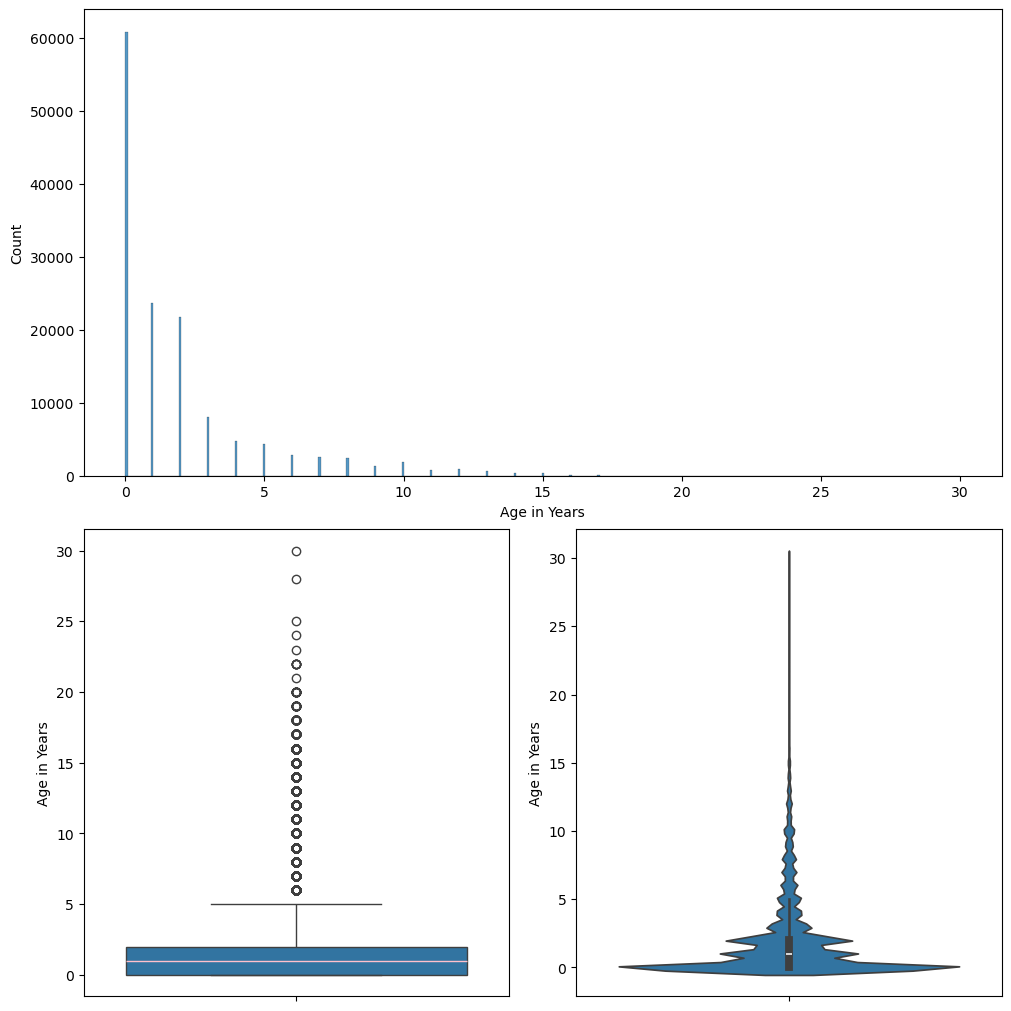

In [31]:
univariate_continuous_dataset(intakes, 'Age in Years')

__Сomments:__ 
* most of the animals entering the shelter are young
* from second graph (boxplot) we can observe outliers, for example in intakes dataset we have only one 30 year old animal 

#### DateTime:

In [32]:
def univariate_continuous_dataset(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Min date", df[column].min()],
        ["Max date", df[column].max()],
        ["Range", df[column].max() - df[column].min()],
    ]), columns=['Title', 'Value'])
    
    display(stats_df)
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=1,nrows=2 ,figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    sns.histplot(data=df, x=column, kde=False, binwidth=1)

,Title,Value
0,Min date,2013-10-01 01:12:00
1,Max date,2022-04-27 07:54:00
2,Range,3130 days 06:42:00


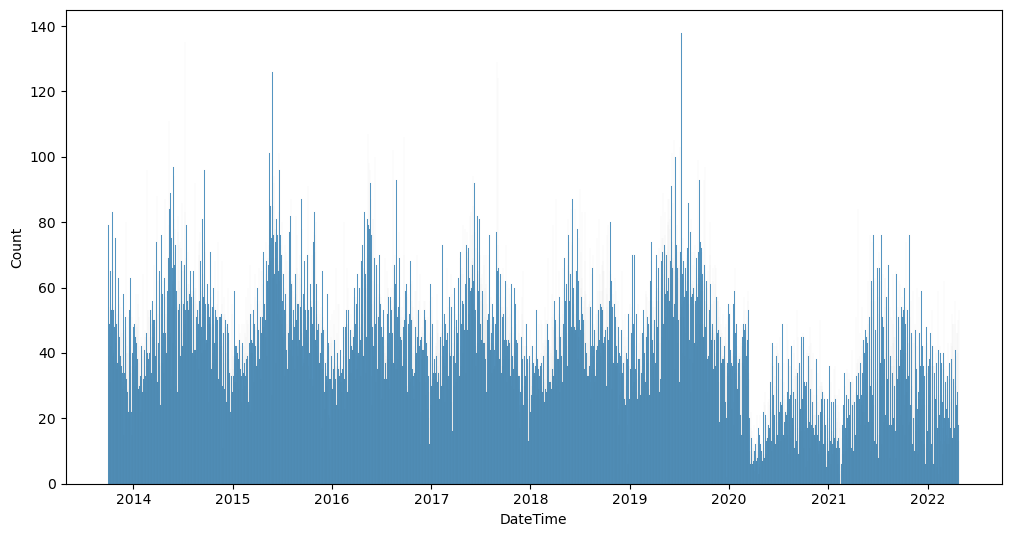

In [33]:
univariate_continuous_dataset(intakes, 'DateTime')

__Comments:__
* from above graph, we can see unusual gap in 2020
* in 2019 the highest number of animal income, there is a high probability that this is related to covid

#### Intake Type

In [34]:
def univariate_category_dataset(df, column):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    stats_df.reset_index(inplace=True)
    display(stats_df)
    
    # select columns
    grouped = stats_df['Frequency'].to_list()
    indexes = stats_df['Intake Type'].to_list()
    # swap
    grouped[-1], grouped[0] = grouped[0], grouped[-1]
    indexes[-1], indexes[0] = indexes[0], indexes[-1]
    # to dataframe
    pie_df = pd.DataFrame({"Intake Type":indexes, "Frequency":grouped})
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive']
    ax1.bar(data=stats_df, x="Intake Type", height="Frequency", color=colors)
    ax1.set_xticks(ticks=df[column].value_counts().index, labels=df[column].value_counts().index, rotation=45)    
    ax1.bar_label(ax1.containers[0])

    colors = ['tab:olive', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue']
    explode = (0.2, 0, 0, 0, 0.2, 0)
    ax2.pie(pie_df['Frequency'], labels=pie_df['Intake Type'], autopct='%1.1f%%', startangle=75, colors=colors, explode=explode)  

,Intake Type,Frequency,Relative frequency
0,Stray,95275,0.687583
1,Owner Surrender,28575,0.206221
2,Public Assist,8344,0.060217
3,Wildlife,5372,0.038769
4,Abandoned,740,0.005340
5,Euthanasia Request,259,0.001869


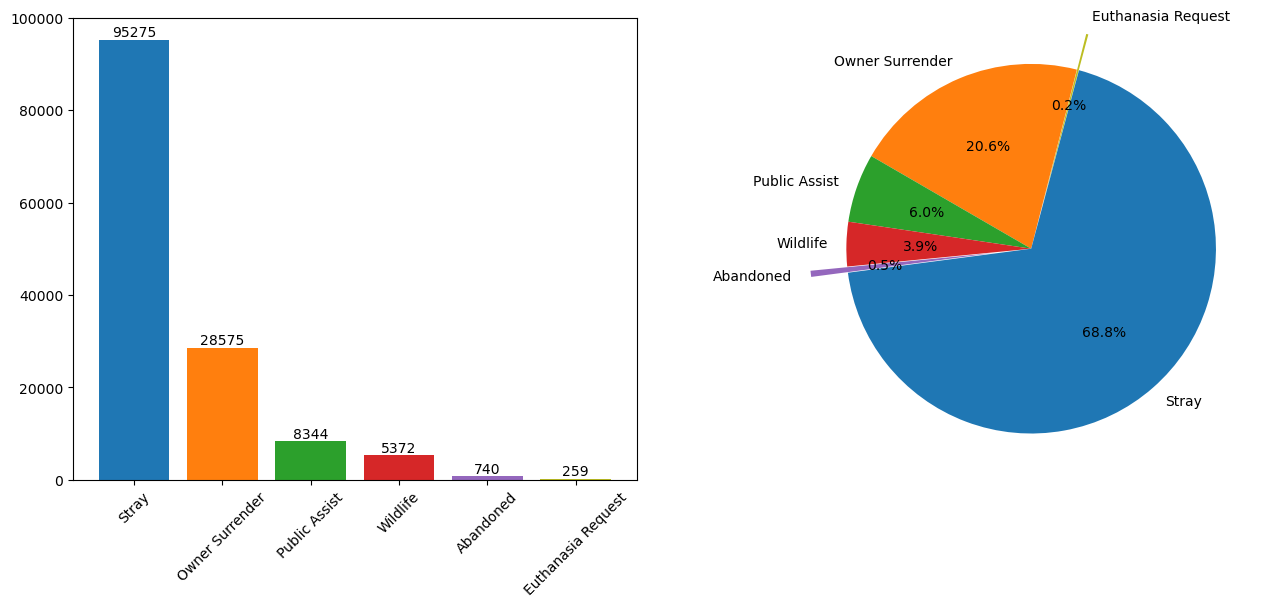

In [35]:
univariate_category_dataset(intakes, 'Intake Type')

#### Intake Type vs. Animal Type

In [36]:
def bivariate_category_category_dataset(df, categorical1, categorical2):
    frequency_table = pd.crosstab(df[categorical1], df[categorical2])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax1)
    ax1.set_title("Numbers")
    sns.heatmap(frequency_table.div(len(df)), cmap='Blues', annot=True, fmt='.3f', ax=ax2)
    ax2.set_title("Percents")
    plt.tight_layout(pad=3)

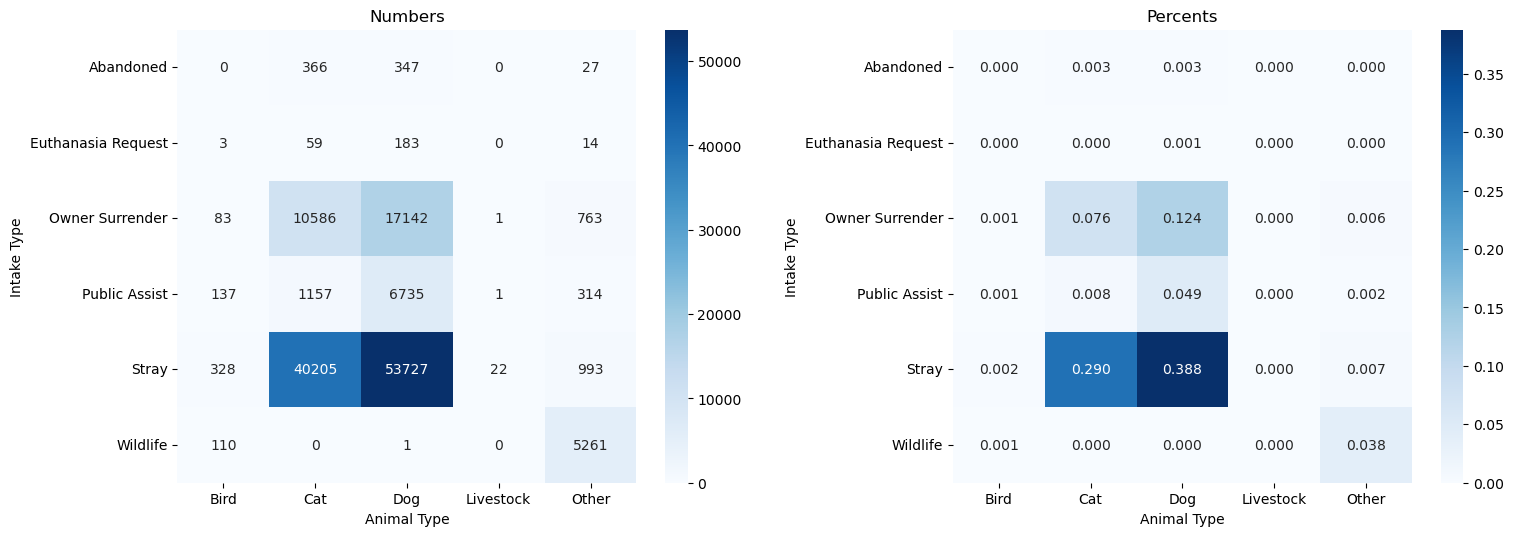

In [37]:
bivariate_category_category_dataset(intakes, 'Intake Type', 'Animal Type')

#### Outcome Type vs. Intake Type

In [38]:
outc = outcomes[['Animal ID', 'Outcome Type']].drop_duplicates()
inc = intakes[['Animal ID', 'Intake Type']].drop_duplicates()
table = outc.merge(inc, on='Animal ID')

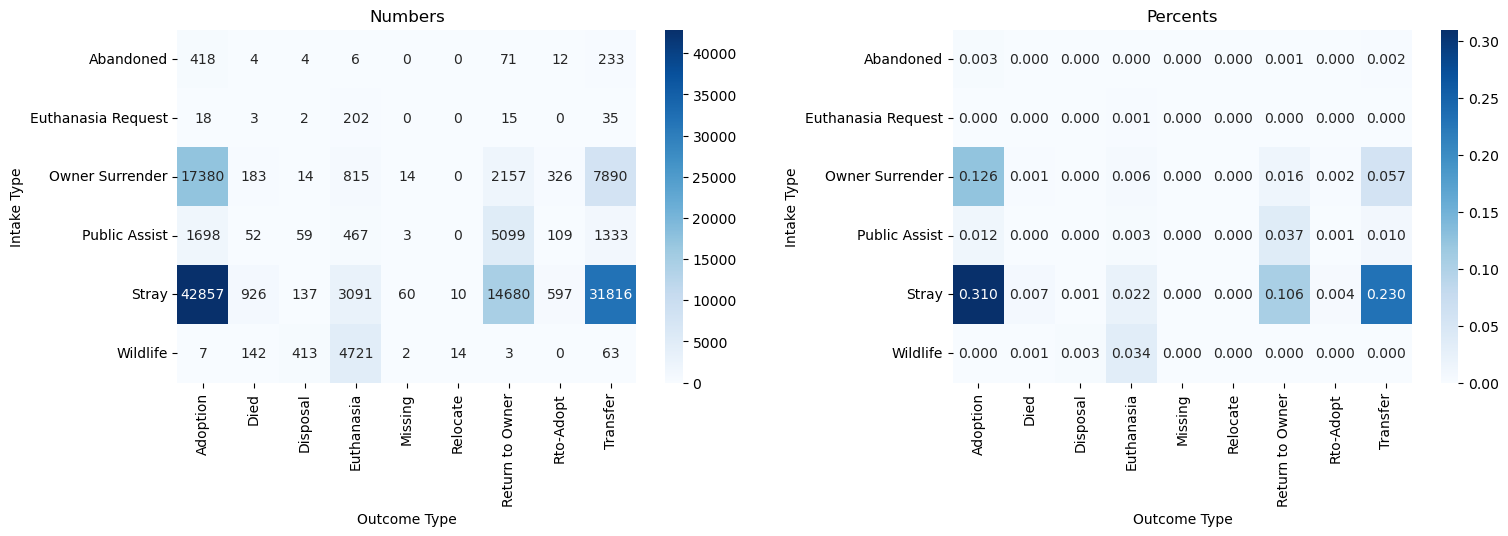

In [39]:
bivariate_category_category_dataset(table, 'Intake Type', 'Outcome Type')

#### Age vs Adoption amount

Pearson correlation coeficient: -0.59390929641416
Spearman correlation coeficient: -0.9954887218045112


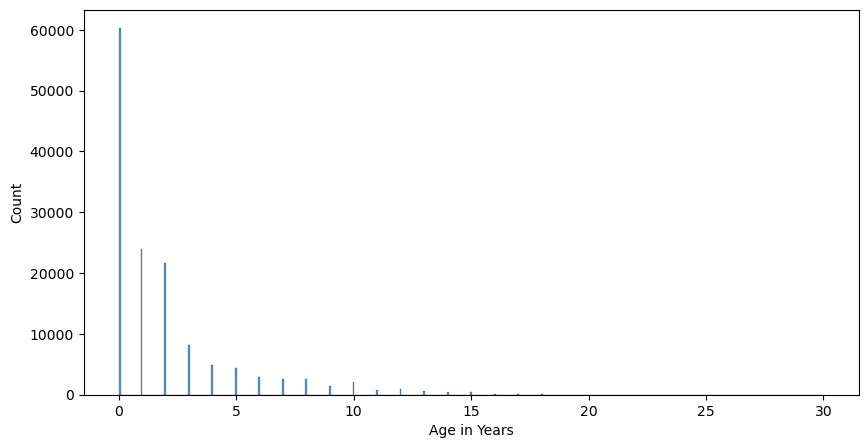

In [40]:
adoption = outcomes[outcomes['Outcome Type'] == 'Adoption'].copy()
group_by_age_in_years = adoption.groupby('Age in Years')['Outcome Type'].count().reset_index()
print('Pearson correlation coeficient: {}'.format(group_by_age_in_years["Age in Years"].corr(group_by_age_in_years["Outcome Type"])))
print('Spearman correlation coeficient: {}'.format(group_by_age_in_years["Age in Years"].corr(group_by_age_in_years["Outcome Type"], method='spearman')))

plt.figure(figsize=(10,5))
sns.histplot(data=outcomes, x=outcomes['Age in Years'], kde=False, bins='auto')
plt.show()

__Comment:__
* easy to understand, younger animals are adopted more often than older ones

#### Intakes vs. Year


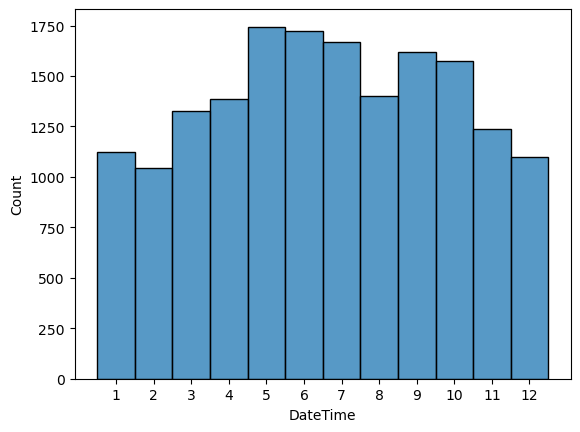

In [41]:
year = intakes[(intakes['DateTime'] >= '2018-01-01') & (intakes['DateTime'] <= '2018-12-31')].copy()
year['DateTime'] = pd.DatetimeIndex(year['DateTime']).month

ax = sns.histplot(data=year, x=year['DateTime'], kde=False, discrete=True)
ax.set_xticks(range(1,13,1))
plt.show()

__Comment:__
* In summer, more animals come to the shelter

#### Sex vs. Adoption amount

In [42]:
def univariate(df, column, title):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    stats_df.reset_index(inplace=True)
    display(stats_df)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    ax1.bar(data=stats_df, x='Sex upon Outcome', height="Frequency", color=colors)
    ax1.set_xticks(ticks=df[column].value_counts().index, labels=df[column].value_counts().index, rotation=45)    
    ax1.bar_label(ax1.containers[0])
    
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    explode = (0.05, 0.05, 0.2, 0.2, 0.2)
    ax2.pie(stats_df['Frequency'], labels=stats_df['Sex upon Outcome'], autopct='%1.1f%%', colors=colors, explode=explode)

    fig.suptitle(title, fontsize=18)


,Sex upon Outcome,Frequency,Relative frequency
0,Neutered Male,30731,0.483854
1,Spayed Female,30026,0.472754
2,Intact Female,1374,0.021633
3,Intact Male,1184,0.018642
4,Unknown,198,0.003117


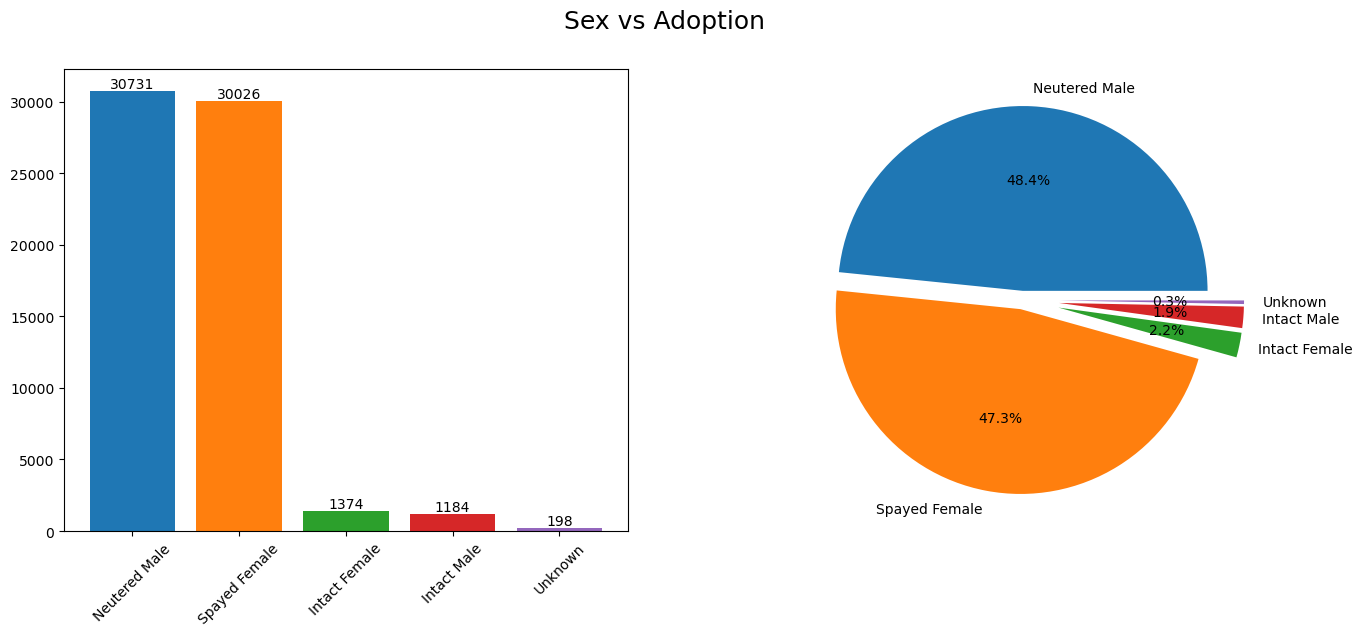

In [43]:
adoption = outcomes[outcomes['Outcome Type'] == 'Adoption']
univariate(adoption, 'Sex upon Outcome', title='Sex vs Adoption')

,Sex upon Outcome,Frequency,Relative frequency
0,Neutered Male,48869,0.352204
1,Spayed Female,44056,0.317516
2,Intact Male,17635,0.127097
3,Intact Female,17140,0.123530
4,Unknown,11052,0.079653


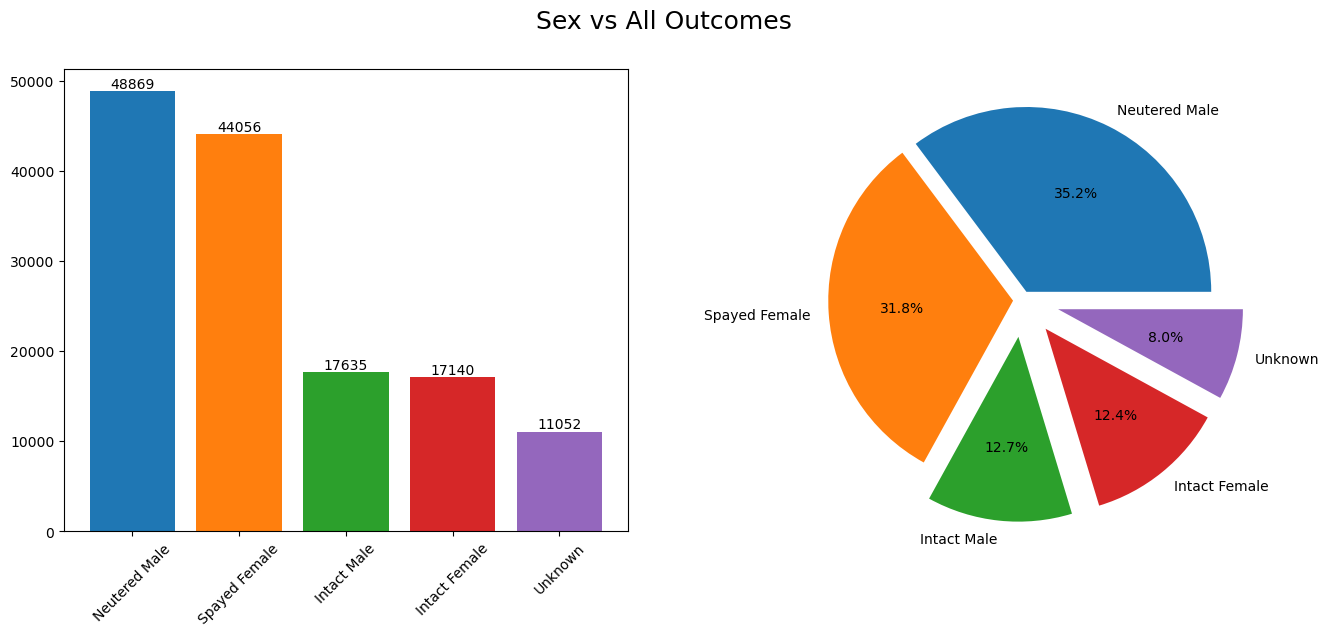

In [44]:
univariate(outcomes, 'Sex upon Outcome', title='Sex vs All Outcomes')

#### Age vs. Time spent in shelter

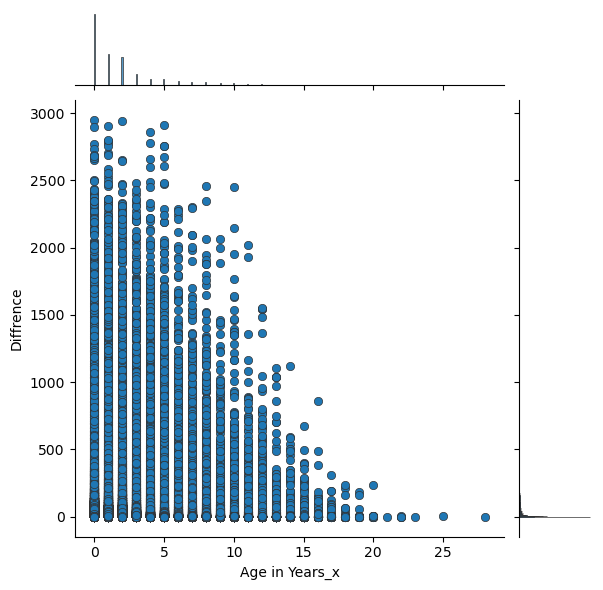

In [45]:
merged = intakes.merge(outcomes,on='Animal ID')
merged = merged[['Animal ID', 'DateTime_y', 'DateTime_x', 'Age in Years_x']]
merged['Diffrence'] = (merged['DateTime_y'] - merged['DateTime_x']).dt.days
merged = merged[merged['Diffrence'] >= 0][['Age in Years_x','Diffrence']]

g = sns.JointGrid(data=merged, x='Age in Years_x', y='Diffrence')
g.plot(sns.scatterplot, sns.histplot, edgecolor=".2", linewidth=.5)
plt.show()